### **TP Final Análisis de Datos:**
Evaluación de la performance de modelos de clasificación con datos tumores de cáncer de mama en *malignos* o *benignos*.

Estudiantes:


*   Gustavo Julián Rivas
*   Myrna Lorena Degano
*   Santiago José Olaciregui
*   Fabricio Lopretto

## 3 - Análisis Exploratorio:
3.1 - Visualizar las primeras filas.

3.2 - Realizar un resumen de 5 números.

3.3 - Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).

3.4 - Identificar las variables de entrada y de salida del problema.

3.4.1 Variables de entrada. Realizar los siguientes análisis por tipo de variable:

3.4.1.1 - Numéricas: Obtener conclusiones acerca de la distribución de los datos.

3.4.1.2 - Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada categoría, etc.

3.4.1.3 - Compuestas: ¿Pueden tratarse para utilizarse en el problema a resolver?

3.4.2 - Variables de salida (en caso de aplicar):

¿Están balanceadas las clases? o (en caso de aplicar)
¿Qué técnicas consideraría para codificar la variable de salida? Justifique.

Los atributos categóricos son:

Atributo | Descripción | Unidad
:---: | :---: | :---:
`diagnosis` | Clasificación en maligno o benigno. | adimensional   


Los atributos continuos para un determinado tumor son calculados a partir de varias mediciones de una misma variable a partir de su correspondiente imagenes.
Por ende, los siguientes atributos tendrán valor medio, desviación estándar y el peor valor (el que más tiende a un diagnóstico de maligno para ese tumor en particular). A partir de la ingeniería de características realizado en la notebook homónima, se resolvó trabajar con las siguientes características:

Atributo | Descripción | Unidad
:---: | :---: | :---:
`radio_mean` | Radio media del tumor. | μm^2          
`radio_worst` | Peor radio del tumor. | μm^2     
`concavity_mean` | Valor medio de la compactación: perimeter^2 / area - 1.0. | adimensional
`concavity_worst` | Peor valor de la compactación: perimeter^2 / area - 1.0. | adimensional            
`concave_points_worst` | Peor valor de número de porciones cóncavas del contorno. | adimensional        


In [ ]:
"""
Este script permite realizar un análisis exploratorio
de los datos para que luego serán utilizados
por modelos de clasificación.
"""

In [1]:
!pip install seaborn


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Se importan las librerias nencesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats

In [3]:
# Se define la ruta al archivo de datos
directorio_actual = os.getcwd()
directorio_padre = os.path.dirname(directorio_actual)
directorio_datos = directorio_padre + '/Data/data_procesados_v2.xlsx'

In [5]:
# Se carga el DataFrame con los registros que tienen los atributos y target.
df = pd.read_excel(directorio_datos, sheet_name='data')

### 3.1 - Visualización de los primeros 5 registros.

In [6]:
# Se llama al metodo 'head' de pandas
df.head()

,diagnosis,radio_mean,concavity_mean,radio_worst,concavity_worst,concave_points_worst
0,M,1.276288,3.223535,2.132549,2.462594,2.481077
1,M,2.082403,0.084056,2.044178,-0.075238,1.209398
2,M,1.807449,1.711225,1.722416,1.051488,2.122316
3,M,-0.776495,2.359147,-0.239875,2.327689,2.354550
4,M,1.994918,1.720060,1.489026,0.779520,0.833020


### 3.2 Resúmen de cinco números.

In [7]:
# Se solicita estadísticos para cada atributo
df.iloc[:, :].describe()

,radio_mean,concavity_mean,radio_worst,concavity_worst,concave_points_worst
count,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02
mean,4.263256e-16,6.459479e-17,-6.071911e-16,-1.291896e-16,7.751375e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.163451e+00,-1.195591e+00,-1.821490e+00,-1.378960e+00,-1.769598e+00
25%,-6.976019e-01,-7.742208e-01,-6.771980e-01,-7.888853e-01,-7.546569e-01
50%,-2.031531e-01,-3.301730e-01,-2.546030e-01,-2.112224e-01,-2.085877e-01
75%,5.053226e-01,5.508543e-01,4.880538e-01,6.293703e-01,7.285147e-01
max,3.350942e+00,3.481231e+00,3.349350e+00,3.201873e+00,2.879878e+00


### 3.3 - Identificar los tipos de datos:

En el punto 2.3 se vio que originalmente se contó con 32 campos, de los cuales 'ID' es entero (int64), 'diagnosis' es categórico (object) y el resto reales (float64). Vale mencionar que de estos, se elminaron varios por reducción de dimensionalidad. Originalmente, las características (tanto en valor mean, std y worst) eran:


*   radio
*   texture
*   perimeter
*   area
*   smoothness
*   compactness
*   concavity
*   concave points
*   symmetry
*   fractal dimension











In [8]:
# Se muestran los tipos de datos de los atributos
print(f"Cantidad de filas: {df.shape[0]}\n")
print(f"Columnas:\n{df.dtypes}")

Cantidad de filas: 550

Columnas:
diagnosis                object
radio_mean              float64
concavity_mean          float64
radio_worst             float64
concavity_worst         float64
concave_points_worst    float64
dtype: object


In [9]:
dtypes = df.dtypes
cate_columns = dtypes[dtypes == 'object'].count()
inte_columns = dtypes[dtypes == 'int64'].count()
real_columns = dtypes[dtypes == 'float64'].count()
print(f"Cant. campos entero: {inte_columns} \nCant. campos categórico: {cate_columns} \nCant. campos real: {real_columns}")

Cant. campos entero: 0 
Cant. campos categórico: 1 
Cant. campos real: 5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             550 non-null    object 
 1   radio_mean            550 non-null    float64
 2   concavity_mean        550 non-null    float64
 3   radio_worst           550 non-null    float64
 4   concavity_worst       550 non-null    float64
 5   concave_points_worst  550 non-null    float64
dtypes: float64(5), object(1)
memory usage: 25.9+ KB


### 3.4 - Identificar las variables de entrada y de salida del problema.

Las variables de entrada del problema son:

*   radio_worst
*   concavity_mean
*   radio_worst
*   concavity_worst
*   concave_worstpoints_worst

Mientras que la variable de salida es el target:
*   diagnosis


### 3.4.1.1 Numéricas: Obtener conclusiones acerca de la distribución de los datos.

In [11]:
# Graficado de características
def distribuciones_reales(df):
  """
  Genera la distribución de las características
  numéricas almacenadas en el DataFrame de entrada.

  :param:
  :df: DataFrame con los atributos.
  """
  # Obtén la lista de nombres de columnas numéricas
  features_numericas = df.select_dtypes(include=['float64']).columns

  # Itera sobre las columnas numéricas y grafica la distribución de cada una
  for feature in features_numericas:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=20, edgecolor=None, kde=True)
    plt.title(f'Histograma de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia absoluta')
    plt.grid(True)
    plt.show()


c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


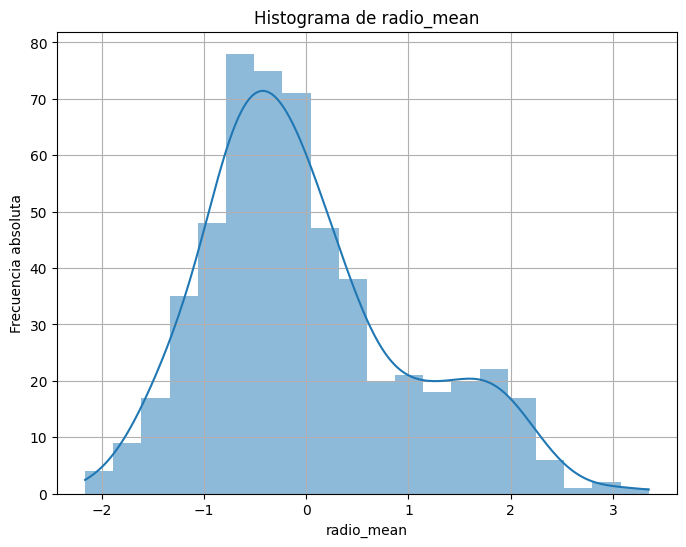

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


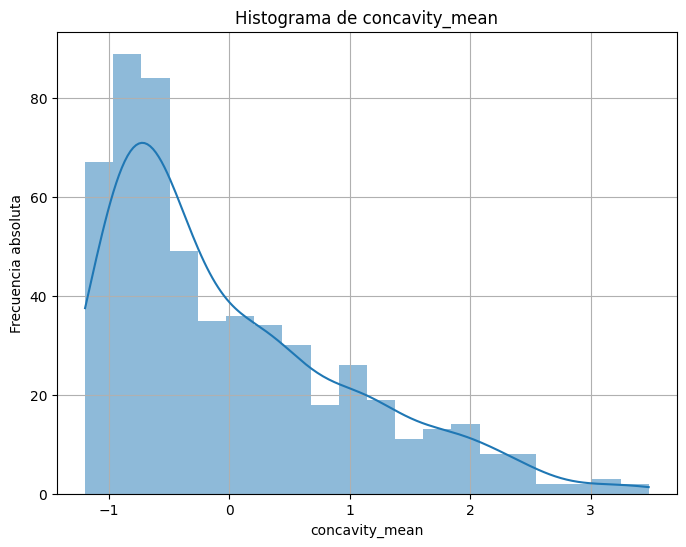

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


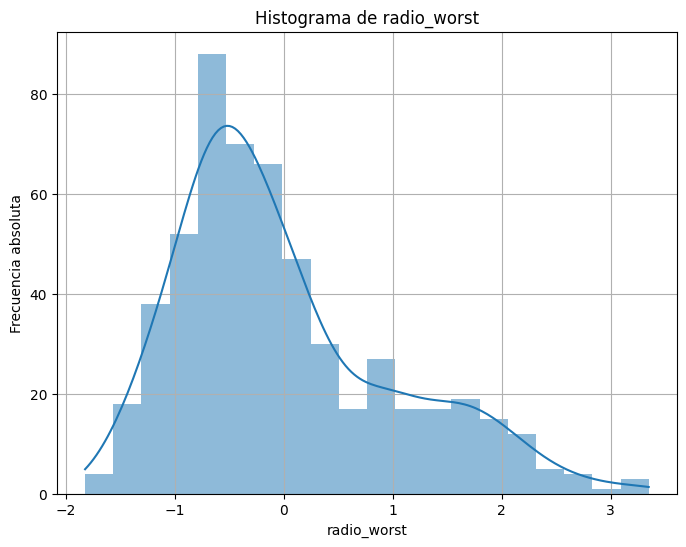

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


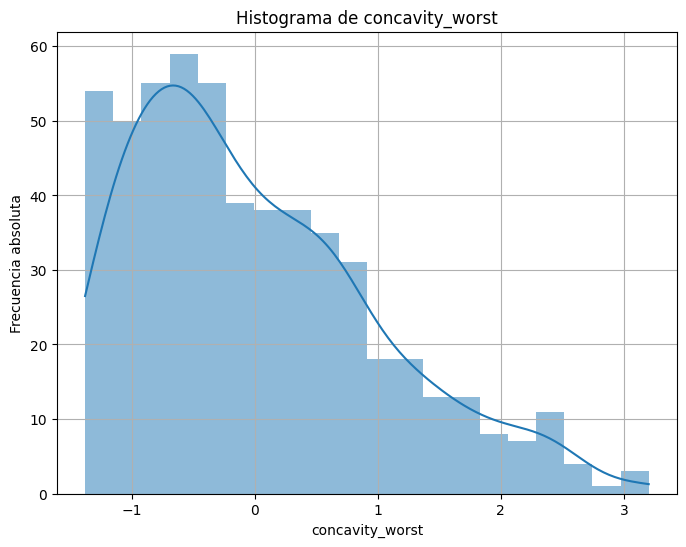

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


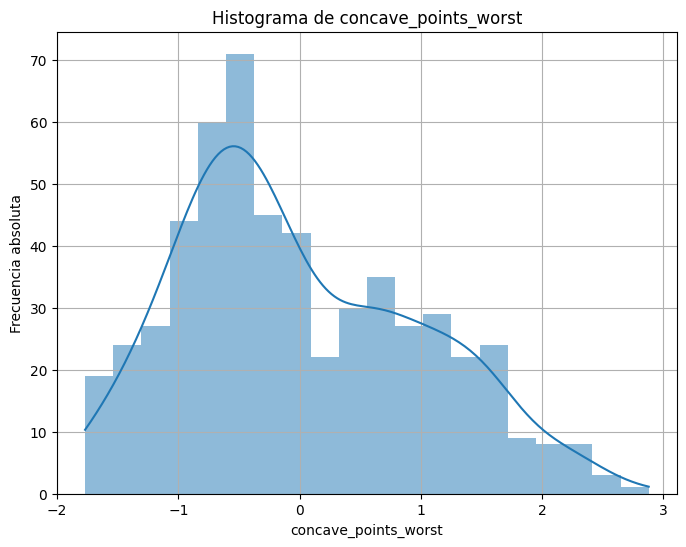

In [12]:
distribuciones_reales(df)

In [13]:
# Graficado de características discriminado por M o B
def distribuciones_discriminadas_reales(df):
  """
  Genera la distribución de las características
  numéricas almacenadas en el DataFrame de entrada
  discriminando cuando el diagnóstico es "maligno"
  y por otro lado cuando es "benigno".

  :param:
  :df: DataFrame con los atributos.
  """
  # Filtrar registros cuando 'categoria' es 'M'
  df_m = df[df['diagnosis'] == 'M']

  # Filtrar registros cuando 'categoria' es 'B'
  df_b = df[df['diagnosis'] == 'B']

  # Obtener lista de nombres de campos numéricos
  features_numericas = df.select_dtypes(include=['float64']).columns

  # Plotear histogramas para cada campo numérico
  for feature in features_numericas:
    plt.figure(figsize=(8, 6))
    # Histograma para 'M'
    sns.histplot(df_m[feature], bins=20, edgecolor=None, color='red', label='M', alpha=0.5, kde=True)
    # Histograma para 'B'
    sns.histplot(df_b[feature], bins=20, edgecolor=None, color='green', label='B', alpha=0.5, kde=True)
    plt.title(f'Histograma de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia absoluta')
    plt.legend()
    plt.grid(True)
    plt.show()


c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


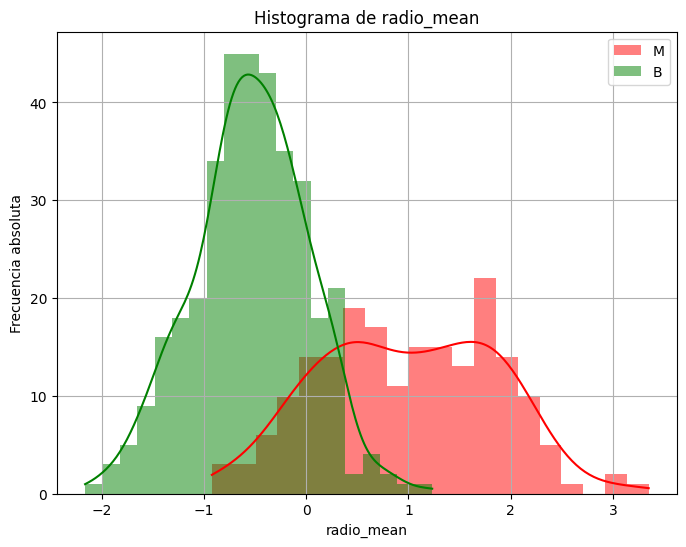

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


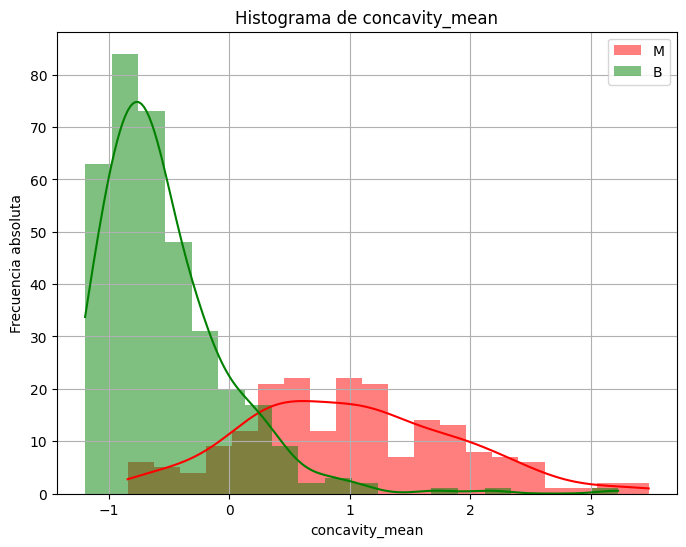

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


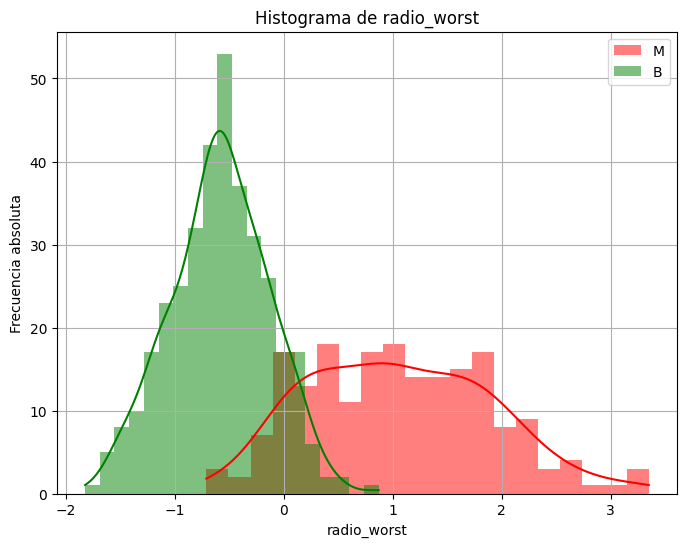

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


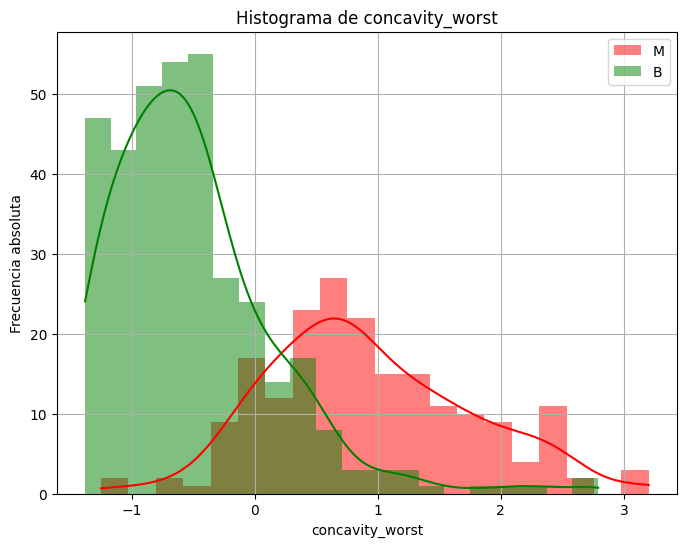

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


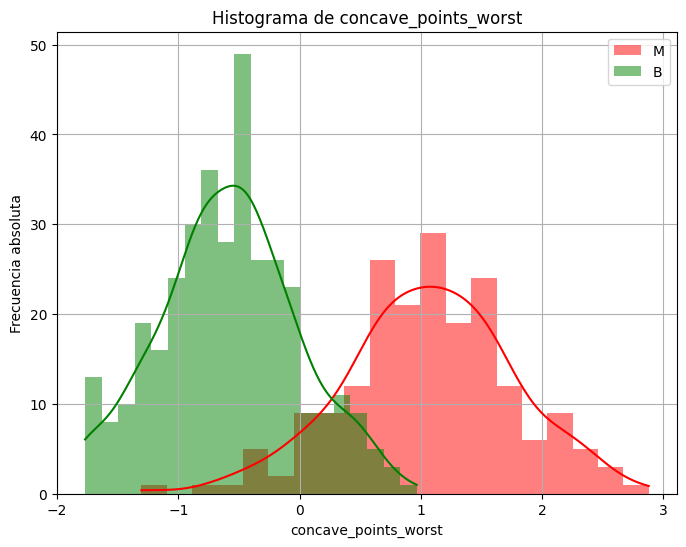

In [14]:
distribuciones_discriminadas_reales(df)

Pregunta 2:  - ¿Cómo se distribuyen las características para tumores benignos vs. malignos?. ¿Existen diferencias significativas en las distribuciones de estas características entre los dos tipos de diagnóstico?

Respuesta: Se observó que en el caso benigno la media y desvío estándar de las características son menores que en el caso maligno. En el caso de la media el resultado es esperable dado que tumores con valores medios de radio_worst (o radio_mean) o concave_points_worst (entre otros) mayores tiende a ser un diagnóstico de tumor ,aligno. Además, en todos los casos ambas distribuciones (maligno/beningo) se encuentran separadas (si bien existe zona de superposción) permitiendo definir rangos empíricos de diagnóstico. También se observó que los máximos en el caso maligno son menores que en el caso benigno. En todos los casos cabe recordar que los histogramas presentados son luego de la estandarización de las características.

### 3.4.1.2 - Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada categoría, etc.

In [15]:
# Graficado de característica categorica
def distribuciones_categoricas(df):
  """
  Genera la distribución de la característica
  categórica almacenadas en el DataFrame de entrada.

  :param:
  :df: DataFrame con los atributos.
  """
  # Filtrar registros cuando 'diagnosis' es 'B' o 'M'
  counts = df['diagnosis'].value_counts()

  # Plotear el histograma
  plt.figure(figsize=(8, 6))
  plt.bar(counts.index, counts.values, width=0.2, align='center')
  plt.title('Distribución de diagnósticos')
  plt.xlabel('Diagóstico')
  plt.ylabel('Frecuencia absoluta')
  plt.legend()
  plt.grid(True)
  plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


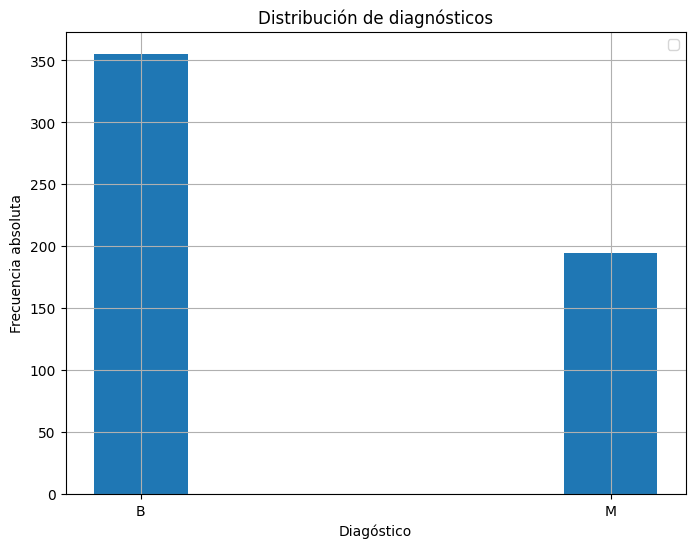

In [16]:
distribuciones_categoricas(df)

Se observó que la cardinalidad de la variable categórica es baja, ya que presenta solo dos estados posibles: 'M' (maligno) ó 'B' (benigno).

Opciones de transformación variable categórica.

Como se vio la variable categórica presenta baja cardinalidad (solo dos clases maligno/benigno), resulta conveniente utilizar la técnica 'One-Hot Encoding'. Se crean por ende dos variables 'dummy' llamadas 'diagnosis_B' y 'diagnosis_M' ambas con valores 0 ó 1. Por último se descarta la variable 'diagnosis_B' para eliminar colinealidad.

In [ ]:
# Crea variables dummy
dummies = pd.get_dummies(df['diagnosis'], prefix='diagnosis')

# Convierte las columnas dummy a valores binarios (False=0 y True=1)
dummies = dummies.astype(int)

# Concatena las variables dummy con el DataFrame original
df_encoded = pd.concat([df, dummies], axis=1)

# Elimina la columna original 'diagnosis' y la columna dummy 'diagnosis_B'
df_encoded.drop(columns=['diagnosis_B'], inplace=True)

In [ ]:
# Se observa el resultado de la transformacion
df_encoded.head()

En cuanto a las características, al ser valores reales con rangos variables (y debido a los modelos de aprendizaje automático a utilizar), se realizó en la notebook de ingeniería de carcterísticas una estandarización de las mismas.

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\fabri\App

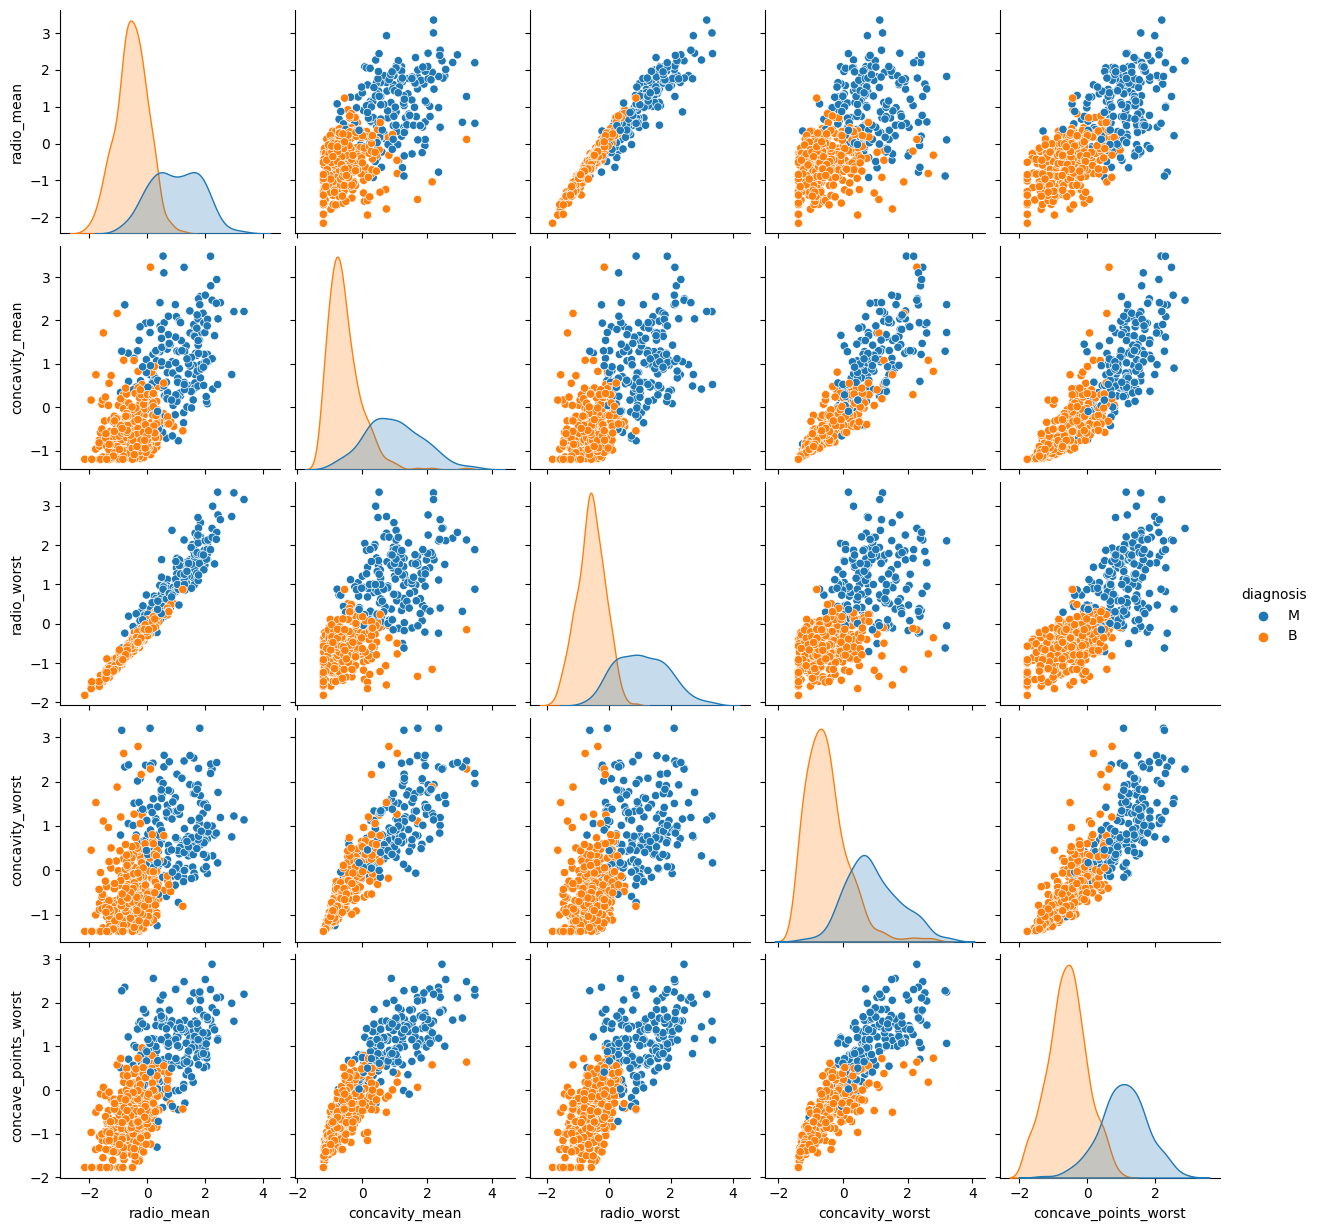

In [17]:
# Crear pairplot
sns.pairplot(df, hue='diagnosis')
plt.show()

Con respecto a las nubes de dispersión de puntos entre las características, se vio que si bien hay algo de superposición, es posible identificar una separación de clases de la variable objetivo, lo que las hace útiles para la predicción. Además, se observó la marcada relación lineal entre radio_worst y radio_mean (se vio en el punto 2.4.1), es posible que una buena práctica sea eliminar una de ellas.

Viendo que las características se encuentran estandarizadas, se buscó realizar la comparación con la normal estándar:

In [19]:
def plotsQQ(df, features):
    """
    Genera los graficos Q-Q plot
    para la lista de características
    indicada.

    :param:
    :df: Dataframe con los datos.
    :features: Lista de características.
    """
    plt.figure(figsize=(5, 25))

    for i, feature in enumerate(features, 1):
        plt.subplot(5, 1, i)
        stats.probplot(df[feature], dist="norm", plot=plt)
        plt.title(f'Q-Q plot para {feature}')

    plt.tight_layout()
    plt.show()


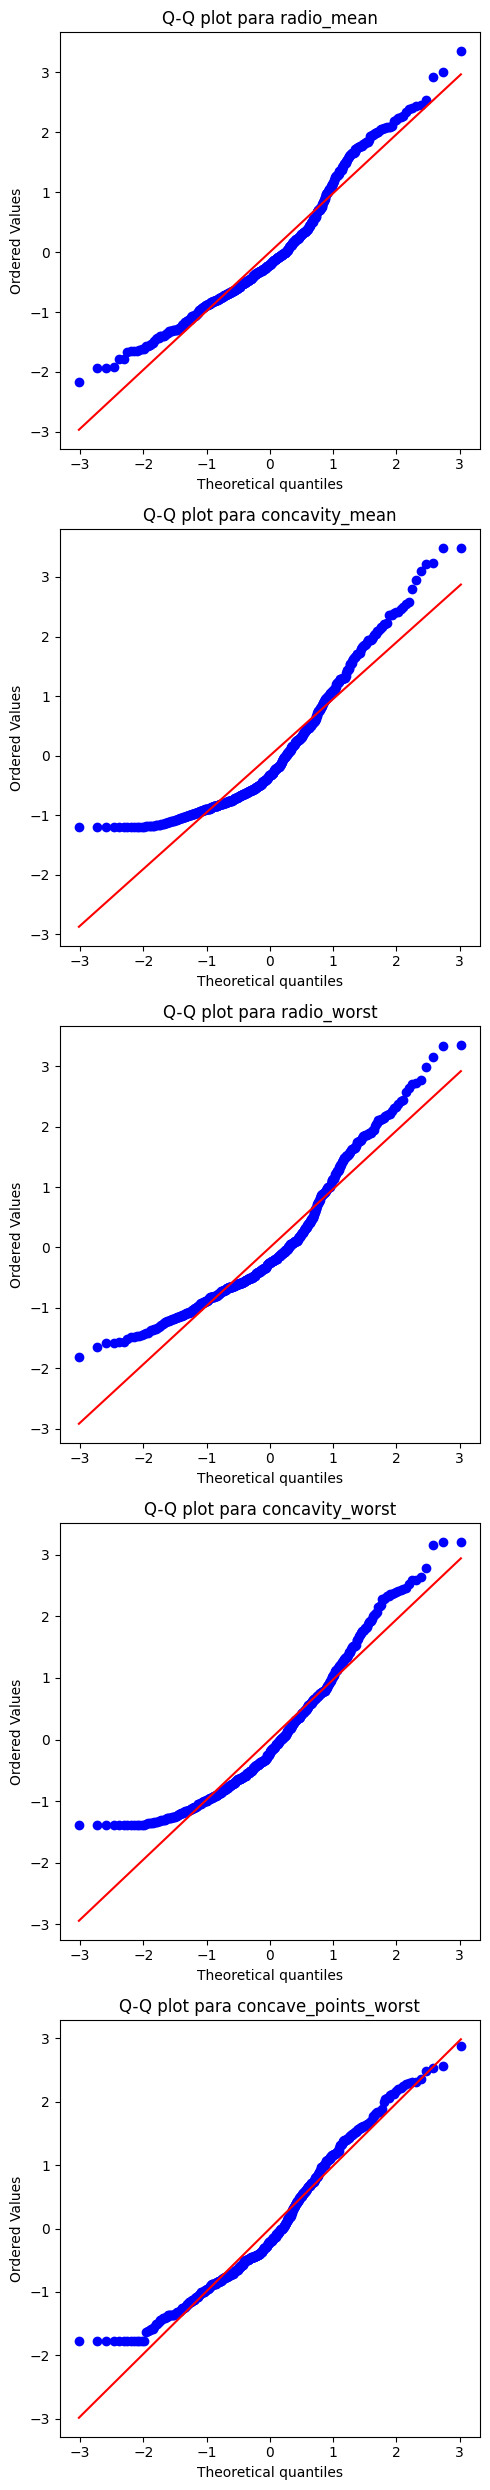

In [21]:
# Selecciona las caracteristicas numericas
features = ['radio_mean', 'concavity_mean', 'radio_worst', 'concavity_worst', 'concave_points_worst']

# Llamada a la funcion
plotsQQ(df, features)

Dado que los puntos forman una curva en forma de "S", los datos tienen colas más pesadas (más valores extremos) que la distribución normal.

Para concave_points_worst y concavity_worst los puntos siguen bastante de cerca la línea diagonal en la parte central, pero se desvían en los extremos (cola). Es decir, los datos se aproximan a una distribución normal en la parte central, pero las colas son más pesadas que las de una distribución normal. Esto sugiere que hay más valores extremos (tanto altos como bajos) de lo que se esperaría en una distribución normal.

En cuanto a radio_mean, radio_worst y concavity_mean los puntos se desvían significativamente de la línea diagonal tanto en los extremos como en la parte central. Los datos no tienden a seguir una distribución normal. La curvatura indica que los datos pueden tener una distribución diferente, con colas más pesadas y una forma general que no es normal.


In [22]:
# Guardado del dataframe procesado

def guardar(df):
  """
  Guarda el data frame con los datos procesados
  en un archivo con terminación xlsx.

  :param:
  :df: DataFrame con los atributos.
  """
  # Especificar la ruta donde deseas guardar el archivo Excel
  ruta_excel = directorio_padre + '/Data/data_para_entrenamiento_v2.xlsx'

  # Leer la ruta del archivo Excel existente
  df_existente = pd.read_excel(ruta_excel)

  # Para el archivo existente pero ya con datos
  df_concatenado = pd.concat([df_existente, df], ignore_index=True)

  # Guardar el DataFrame concatenado en el archivo Excel existente
  df_concatenado.to_excel(ruta_excel, index=False)

In [23]:
guardar(df)